In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as tfk
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

2023-06-30 23:51:06.131962: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-30 23:51:06.887443: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


We want to train a classifier that could predict the cell types for cells in the query dataset (or at least the most similar cell type). 

In [2]:
df_ref_embd = pd.read_csv("reference_25000_embeddings.csv")
df_ref_embd.head(1)

index         0         1         2         3        4  \
0  TAGAGCTCAAATCCGT-1-6 -0.032414  0.057974  0.087438  0.145255  0.35875   

          5         6         7         8  ...        41        42        43  \
0 -0.148384  0.052471  0.111788  0.161676  ...  0.077401 -0.049131  0.047382   

         44        45        46        47        48        49      label  
0  0.087231 -0.266219  0.056287 -0.008538  0.278938 -0.101215  club cell  

[1 rows x 52 columns]

First we encode the labels.

In [3]:
le = preprocessing.LabelEncoder()
df_ref_embd["label"] = le.fit_transform(df_ref_embd["label"])
X = df_ref_embd.drop(["label", "index"], axis=1)
y = df_ref_embd["label"]

In [4]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.15)

We create a simple classifier using Keras and train it on reference embedding.

In [9]:
classifier = models.Sequential([
    tf.keras.layers.Dense(64, activation = tf.nn.relu),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(256, activation = tf.nn.relu),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(64, activation = tf.nn.relu),
    tf.keras.layers.Dense(50, activation = tf.nn.softmax)
])

classifier.compile(
    optimizer = optimizers.legacy.Adam(learning_rate=0.0005),
    loss = 'sparse_categorical_crossentropy',
    metrics =['accuracy']
)

In [10]:
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)
history = classifier.fit(
    X_train, 
    y_train,
    epochs = 500,
    batch_size = 64,
    validation_split = 0.2,
    verbose=1,
    callbacks=[earlystopping]
)

Epoch 1/500
266/266 [==============================] - 1s 4ms/step - loss: 3.1014 - accuracy: 0.1454 - val_loss: 2.8413 - val_accuracy: 0.2000
Epoch 2/500
266/266 [==============================] - 1s 3ms/step - loss: 2.7828 - accuracy: 0.2367 - val_loss: 2.6529 - val_accuracy: 0.2840
Epoch 3/500
266/266 [==============================] - 1s 3ms/step - loss: 2.6437 - accuracy: 0.2806 - val_loss: 2.5620 - val_accuracy: 0.3047
Epoch 4/500
266/266 [==============================] - 1s 3ms/step - loss: 2.5599 - accuracy: 0.2960 - val_loss: 2.4785 - val_accuracy: 0.3127
Epoch 5/500
266/266 [==============================] - 1s 3ms/step - loss: 2.4745 - accuracy: 0.3107 - val_loss: 2.3814 - val_accuracy: 0.3348
Epoch 6/500
266/266 [==============================] - 1s 3ms/step - loss: 2.3973 - accuracy: 0.3321 - val_loss: 2.3442 - val_accuracy: 0.3421
Epoch 7/500
266/266 [==============================] - 1s 3ms/step - loss: 2.3218 - accuracy: 0.3462 - val_loss: 2.2439 - val_accuracy: 0.3635

Epoch 58/500
266/266 [==============================] - 1s 3ms/step - loss: 1.9380 - accuracy: 0.4250 - val_loss: 1.9393 - val_accuracy: 0.4226
Epoch 59/500
266/266 [==============================] - 1s 3ms/step - loss: 1.9316 - accuracy: 0.4286 - val_loss: 1.9404 - val_accuracy: 0.4238
Epoch 60/500
266/266 [==============================] - 1s 3ms/step - loss: 1.9235 - accuracy: 0.4304 - val_loss: 1.9463 - val_accuracy: 0.4195
Epoch 61/500
266/266 [==============================] - 1s 3ms/step - loss: 1.9273 - accuracy: 0.4274 - val_loss: 1.9374 - val_accuracy: 0.4292
Epoch 62/500
266/266 [==============================] - 1s 3ms/step - loss: 1.9246 - accuracy: 0.4295 - val_loss: 1.9306 - val_accuracy: 0.4334
Epoch 63/500
266/266 [==============================] - 1s 3ms/step - loss: 1.9222 - accuracy: 0.4285 - val_loss: 1.9290 - val_accuracy: 0.4247
Epoch 64/500
266/266 [==============================] - 1s 3ms/step - loss: 1.9128 - accuracy: 0.4303 - val_loss: 1.9264 - val_accuracy:

Epoch 115/500
266/266 [==============================] - 1s 3ms/step - loss: 1.8105 - accuracy: 0.4574 - val_loss: 1.8737 - val_accuracy: 0.4376
Epoch 116/500
266/266 [==============================] - 1s 3ms/step - loss: 1.8112 - accuracy: 0.4572 - val_loss: 1.8697 - val_accuracy: 0.4452
Epoch 117/500
266/266 [==============================] - 1s 3ms/step - loss: 1.8131 - accuracy: 0.4572 - val_loss: 1.9158 - val_accuracy: 0.4285
Epoch 118/500
266/266 [==============================] - 1s 3ms/step - loss: 1.8079 - accuracy: 0.4573 - val_loss: 1.8957 - val_accuracy: 0.4398
Epoch 119/500
266/266 [==============================] - 1s 3ms/step - loss: 1.8066 - accuracy: 0.4556 - val_loss: 1.8551 - val_accuracy: 0.4499
Epoch 120/500
266/266 [==============================] - 1s 3ms/step - loss: 1.8100 - accuracy: 0.4585 - val_loss: 1.9215 - val_accuracy: 0.4365
Epoch 121/500
266/266 [==============================] - 1s 3ms/step - loss: 1.7994 - accuracy: 0.4618 - val_loss: 1.8789 - val_ac

266/266 [==============================] - 1s 3ms/step - loss: 1.6756 - accuracy: 0.4819 - val_loss: 1.8381 - val_accuracy: 0.4631
Epoch 228/500
266/266 [==============================] - 1s 3ms/step - loss: 1.6786 - accuracy: 0.4801 - val_loss: 1.8680 - val_accuracy: 0.4487
Epoch 229/500
266/266 [==============================] - 1s 3ms/step - loss: 1.6725 - accuracy: 0.4836 - val_loss: 1.8465 - val_accuracy: 0.4546
Epoch 230/500
266/266 [==============================] - 1s 3ms/step - loss: 1.6698 - accuracy: 0.4849 - val_loss: 1.8769 - val_accuracy: 0.4468
Epoch 231/500
266/266 [==============================] - 1s 3ms/step - loss: 1.6827 - accuracy: 0.4789 - val_loss: 1.8658 - val_accuracy: 0.4464
Epoch 232/500
266/266 [==============================] - 1s 3ms/step - loss: 1.6725 - accuracy: 0.4824 - val_loss: 1.8665 - val_accuracy: 0.4555
Epoch 233/500
266/266 [==============================] - 1s 3ms/step - loss: 1.6802 - accuracy: 0.4804 - val_loss: 1.8587 - val_accuracy: 0.4485

266/266 [==============================] - 1s 3ms/step - loss: 1.5817 - accuracy: 0.4984 - val_loss: 1.8789 - val_accuracy: 0.4520
Epoch 340/500
266/266 [==============================] - 1s 3ms/step - loss: 1.5758 - accuracy: 0.5065 - val_loss: 1.8589 - val_accuracy: 0.4621
Epoch 341/500
266/266 [==============================] - 1s 3ms/step - loss: 1.5914 - accuracy: 0.4986 - val_loss: 1.8592 - val_accuracy: 0.4638
Epoch 342/500
266/266 [==============================] - 1s 3ms/step - loss: 1.5830 - accuracy: 0.4991 - val_loss: 1.8338 - val_accuracy: 0.4633
Epoch 343/500
266/266 [==============================] - 1s 3ms/step - loss: 1.5721 - accuracy: 0.5074 - val_loss: 1.8758 - val_accuracy: 0.4668
Epoch 344/500
266/266 [==============================] - 1s 3ms/step - loss: 1.5822 - accuracy: 0.5006 - val_loss: 1.8450 - val_accuracy: 0.4579
Epoch 345/500
266/266 [==============================] - 1s 3ms/step - loss: 1.5660 - accuracy: 0.5067 - val_loss: 1.8436 - val_accuracy: 0.4682

266/266 [==============================] - 1s 3ms/step - loss: 1.4954 - accuracy: 0.5179 - val_loss: 1.8774 - val_accuracy: 0.4659
Epoch 452/500
266/266 [==============================] - 1s 3ms/step - loss: 1.5105 - accuracy: 0.5159 - val_loss: 1.8681 - val_accuracy: 0.4605
Epoch 453/500
266/266 [==============================] - 1s 3ms/step - loss: 1.4979 - accuracy: 0.5186 - val_loss: 1.8775 - val_accuracy: 0.4682
Epoch 454/500
266/266 [==============================] - 1s 3ms/step - loss: 1.5025 - accuracy: 0.5195 - val_loss: 1.8881 - val_accuracy: 0.4645
Epoch 455/500
266/266 [==============================] - 1s 3ms/step - loss: 1.5056 - accuracy: 0.5198 - val_loss: 1.9099 - val_accuracy: 0.4572
Epoch 456/500
266/266 [==============================] - 1s 3ms/step - loss: 1.5007 - accuracy: 0.5152 - val_loss: 1.8743 - val_accuracy: 0.4626
Epoch 457/500
266/266 [==============================] - 1s 3ms/step - loss: 1.4918 - accuracy: 0.5238 - val_loss: 1.8977 - val_accuracy: 0.4555

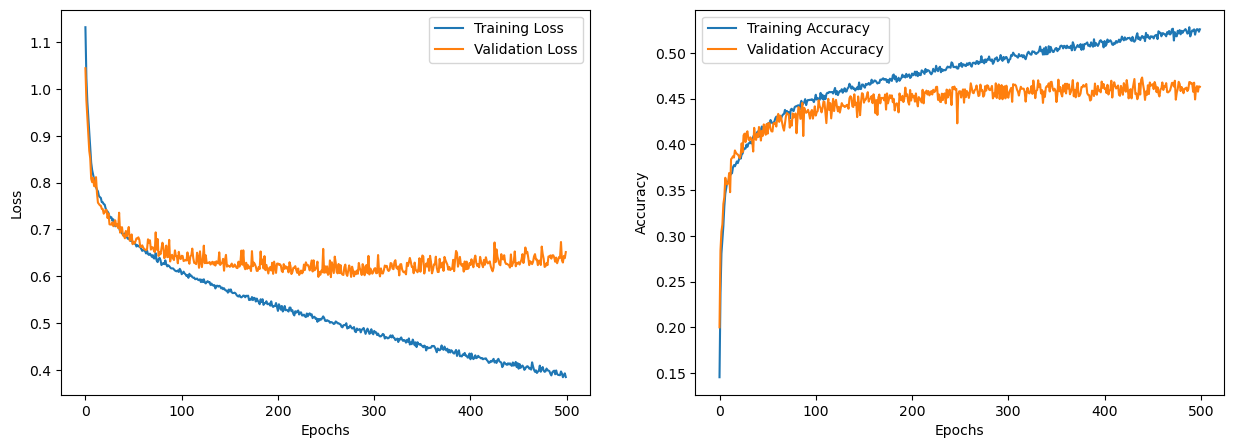

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")
axs[0].plot(np.log(history.history["loss"]), label="Training Loss")
axs[0].plot(np.log(history.history["val_loss"]), label="Validation Loss")
axs[0].legend()

axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Accuracy")
axs[1].plot(history.history["accuracy"], label="Training Accuracy")
axs[1].plot(history.history["val_accuracy"], label="Validation Accuracy")
axs[1].legend()


The model looks overfit but that's not the problem we are trying to solve.

In [17]:
# classifier.save("classifier.keras")

# Applying to Query data

Now we want to apply the model on query data to find most similar cell type for each cell in the query data.

In [5]:
classifier = tf.keras.saving.load_model("classifier.keras")

2023-06-30 23:51:43.003254: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-30 23:51:43.045665: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-30 23:51:43.046294: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-30 23:51:43.048046: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-30 23:51:43.048580: I tensorflow/compile

In [59]:
df_query_embd = pd.read_csv("query_embeddings.csv")
df_query_embd.head(1)

index         0        1         2         3         4  \
0  GGTGTCGTCCACCTCA-1  0.019446 -0.15333 -0.278318  0.164249 -0.021989   

          5         6         7        8  ...        41        42        43  \
0 -0.160254 -0.038581 -0.094466  0.14484  ...  0.087068  0.117094 -0.130094   

         44       45        46        47        48        49    label  
0 -0.055968 -0.01931  0.020081 -0.170195 -0.038031 -0.125144  Unknown  

[1 rows x 52 columns]

In [60]:
X_query = df_query_embd.drop(["label", "index"], axis=1)
X_query.head(1)

0        1         2         3         4         5         6  \
0  0.019446 -0.15333 -0.278318  0.164249 -0.021989 -0.160254 -0.038581   

          7        8         9  ...        40        41        42        43  \
0 -0.094466  0.14484 -0.061899  ... -0.036121  0.087068  0.117094 -0.130094   

         44       45        46        47        48        49  
0 -0.055968 -0.01931  0.020081 -0.170195 -0.038031 -0.125144  

[1 rows x 50 columns]

In [61]:
df_query_embd["gt"] = df_query_embd["label"]
df_query_embd["label"] = np.argmax(classifier.predict(X_query), axis=1)
df_query_embd["label"] = le.inverse_transform(df_query_embd["label"])
df_query_embd

67/67 [==============================] - 0s 3ms/step


index         0         1         2         3         4  \
0     GGTGTCGTCCACCTCA-1  0.019446 -0.153330 -0.278318  0.164249 -0.021989   
1     CATTCCGGTCGAACGA-1  0.010809 -0.166326 -0.271252  0.158161 -0.027636   
2     TCACAAGAGACAGCGT-1  0.035513 -0.158929 -0.258002  0.160303  0.000043   
3     AGAGAATAGAAGCTGC-1  0.025086 -0.163285 -0.246495  0.127596  0.000186   
4     ACACAGTAGGCCATAG-1  0.031776 -0.151229 -0.217306  0.115698  0.018674   
...                  ...       ...       ...       ...       ...       ...   
2137  CTATCTAAGGTTGGAC-1 -0.125862 -0.071421 -0.356605  0.138877 -0.017156   
2138  CATCCCACATACAGAA-1 -0.002114 -0.148442 -0.309766  0.142521 -0.000655   
2139  TCGATTTAGTAATACG-1 -0.081290 -0.114030 -0.348925  0.148197 -0.006093   
2140  TGGTAGTCAGAACATA-1 -0.125862 -0.071421 -0.356605  0.138877 -0.017156   
2141  TAGTGCATCAAGTTGC-1 -0.125862 -0.071421 -0.356605  0.138877 -0.017156   

             5         6         7         8  ...        42        43  \
0    -0.160254 -0.038581 -0.094466  0.144840  ...  0.117094 -0.130094   
1    -0.144682 -0.035615 -0.129476  0.146420  ...  0.122207 -0.137912   
2    -0.141538 -0.047350 -0.115062  0.149228  ...  0.102591 -0.139649   
3    -0.147295 -0.031335 -0.132369  0.162034  ...  0.102656 -0.141496   
4    -0.134231 -0.052899 -0.138344  0.181737  ...  0.110494 -0.161310   
...        ...       ...       ...       ...  ...       ...       ...   
2137 -0.207344 -0.134352  0.038306  0.140575  ...  0.057924 -0.117690   
2138 -0.183262 -0.083725 -0.051639  0.137402  ...  0.117978 -0.136274   
2139 -0.206061 -0.130249 -0.001069  0.145054  ...  0.079513 -0.126193   
2140 -0.207344 -0.134352  0.038306  0.140575  ...  0.057924 -0.117690   
2141 -0.207344 -0.134352  0.038306  0.140575  ...  0.057924 -0.117690   

            44        45        46        47        48        49  \
0    -0.055968 -0.019310  0.020081 -0.170195 -0.038031 -0.125144   
1    -0.060735  0.003016  0.007866 -0.147321 -0.056335 -0.095594   
2    -0.047961  0.013308 -0.019045 -0.130185 -0.026740 -0.105731   
3    -0.037998  0.018116 -0.012161 -0.144526 -0.023726 -0.103952   
4    -0.032262  0.040571 -0.019056 -0.098948 -0.008678 -0.086905   
...        ...       ...       ...       ...       ...       ...   
2137 -0.038831 -0.064451  0.180759 -0.277693 -0.069600 -0.092403   
2138 -0.069801 -0.039312  0.086099 -0.202537 -0.049528 -0.121922   
2139 -0.050285 -0.055965  0.147287 -0.247355 -0.060883 -0.108533   
2140 -0.038831 -0.064451  0.180759 -0.277693 -0.069600 -0.092403   
2141 -0.038831 -0.064451  0.180759 -0.277693 -0.069600 -0.092403   

                               label       gt  
0     multi-ciliated epithelial cell  Unknown  
1                alveolar macrophage  Unknown  
2                alveolar macrophage  Unknown  
3                alveolar macrophage  Unknown  
4                alveolar macrophage  Unknown  
...                              ...      ...  
2137  multi-ciliated epithelial cell  Unknown  
2138  multi-ciliated epithelial cell  Unknown  
2139  multi-ciliated epithelial cell  Unknown  
2140  multi-ciliated epithelial cell  Unknown  
2141  multi-ciliated epithelial cell  Unknown  

[2142 rows x 53 columns]

In [67]:
df_merged = df_ref_embd.copy()
df_merged["is_ref"] = True
df_merged["label"] = le.inverse_transform(df_merged["label"])

df_merged = pd.concat([df_merged, df_query_embd.drop(["gt"], axis=1)], axis=0)
df_merged["is_ref"] = df_merged["is_ref"].fillna(False)
df_merged = df_merged.reset_index(drop=True)
df_merged

index         0         1         2         3  \
0               TAGAGCTCAAATCCGT-1-6 -0.032414  0.057974  0.087438  0.145255   
1      TATCAGGTCGGTGTC_GRO-10_biopsy -0.055259  0.060903  0.046917  0.152649   
2            AAGGTTCTCGGCTACG_F02617 -0.047443  0.083872  0.060183  0.148262   
3            CGCCAAGCACGTCTCT_F01508 -0.035819  0.090811  0.074683  0.111665   
4              GTACTCCTCACAGGCC_SC29 -0.046687  0.057959  0.074406  0.153424   
...                              ...       ...       ...       ...       ...   
27137             CTATCTAAGGTTGGAC-1 -0.125862 -0.071421 -0.356605  0.138877   
27138             CATCCCACATACAGAA-1 -0.002114 -0.148442 -0.309766  0.142521   
27139             TCGATTTAGTAATACG-1 -0.081290 -0.114030 -0.348925  0.148197   
27140             TGGTAGTCAGAACATA-1 -0.125862 -0.071421 -0.356605  0.138877   
27141             TAGTGCATCAAGTTGC-1 -0.125862 -0.071421 -0.356605  0.138877   

              4         5         6         7         8  ...        42  \
0      0.358750 -0.148384  0.052471  0.111788  0.161676  ... -0.049131   
1      0.329447 -0.167066  0.080283  0.090626  0.158808  ... -0.053517   
2      0.328090 -0.165877  0.082293  0.074023  0.169802  ... -0.041883   
3      0.316276 -0.113175  0.037084  0.140821  0.150143  ... -0.081310   
4      0.357122 -0.155742  0.071886  0.109532  0.165660  ... -0.054167   
...         ...       ...       ...       ...       ...  ...       ...   
27137 -0.017156 -0.207344 -0.134352  0.038306  0.140575  ...  0.057924   
27138 -0.000655 -0.183262 -0.083725 -0.051639  0.137402  ...  0.117978   
27139 -0.006093 -0.206061 -0.130249 -0.001069  0.145054  ...  0.079513   
27140 -0.017156 -0.207344 -0.134352  0.038306  0.140575  ...  0.057924   
27141 -0.017156 -0.207344 -0.134352  0.038306  0.140575  ...  0.057924   

             43        44        45        46        47        48        49  \
0      0.047382  0.087231 -0.266219  0.056287 -0.008538  0.278938 -0.101215   
1      0.029379  0.092054 -0.245067  0.087911 -0.033680  0.316130 -0.089624   
2      0.034281  0.096102 -0.250097  0.079163 -0.023300  0.304385 -0.099903   
3      0.039860  0.120750 -0.283750  0.102640  0.042777  0.280102 -0.067193   
4      0.041100  0.087318 -0.263014  0.068800 -0.007920  0.291319 -0.087608   
...         ...       ...       ...       ...       ...       ...       ...   
27137 -0.117690 -0.038831 -0.064451  0.180759 -0.277693 -0.069600 -0.092403   
27138 -0.136274 -0.069801 -0.039312  0.086099 -0.202537 -0.049528 -0.121922   
27139 -0.126193 -0.050285 -0.055965  0.147287 -0.247355 -0.060883 -0.108533   
27140 -0.117690 -0.038831 -0.064451  0.180759 -0.277693 -0.069600 -0.092403   
27141 -0.117690 -0.038831 -0.064451  0.180759 -0.277693 -0.069600 -0.092403   

                                 label  is_ref  
0                            club cell    True  
1      CD4-positive, alpha-beta T cell    True  
2                   type II pneumocyte    True  
3                  elicited macrophage    True  
4                  alveolar macrophage    True  
...                                ...     ...  
27137   multi-ciliated epithelial cell   False  
27138   multi-ciliated epithelial cell   False  
27139   multi-ciliated epithelial cell   False  
27140   multi-ciliated epithelial cell   False  
27141   multi-ciliated epithelial cell   False  

[27142 rows x 53 columns]

# Plotting

Now we want to see how the UMAP these embeddings look like.

In [45]:
import umap
reducer = umap.UMAP()
umap_embedding = reducer.fit_transform(df_merged.drop(["index", "label", "is_ref"], axis=1))
umap_embedding = pd.DataFrame(umap_embedding)

In [70]:
umap_embedding["label"] = df_merged["label"]
umap_embedding["is_ref"] = df_merged["is_ref"]
umap_embedding

0          1                            label  is_ref
0      11.449062   5.986343                        club cell    True
1       8.666632  13.580647  CD4-positive, alpha-beta T cell    True
2       7.504073  12.578952               type II pneumocyte    True
3      10.516414 -10.696675              elicited macrophage    True
4      11.442378   8.561480              alveolar macrophage    True
...          ...        ...                              ...     ...
27137  -1.296598   4.989618   multi-ciliated epithelial cell   False
27138  -4.995429   2.502575   multi-ciliated epithelial cell   False
27139  -1.614771   1.852395   multi-ciliated epithelial cell   False
27140  -1.296691   4.991901   multi-ciliated epithelial cell   False
27141  -1.296443   4.989702   multi-ciliated epithelial cell   False

[27142 rows x 4 columns]

<Axes: xlabel='1', ylabel='0'>

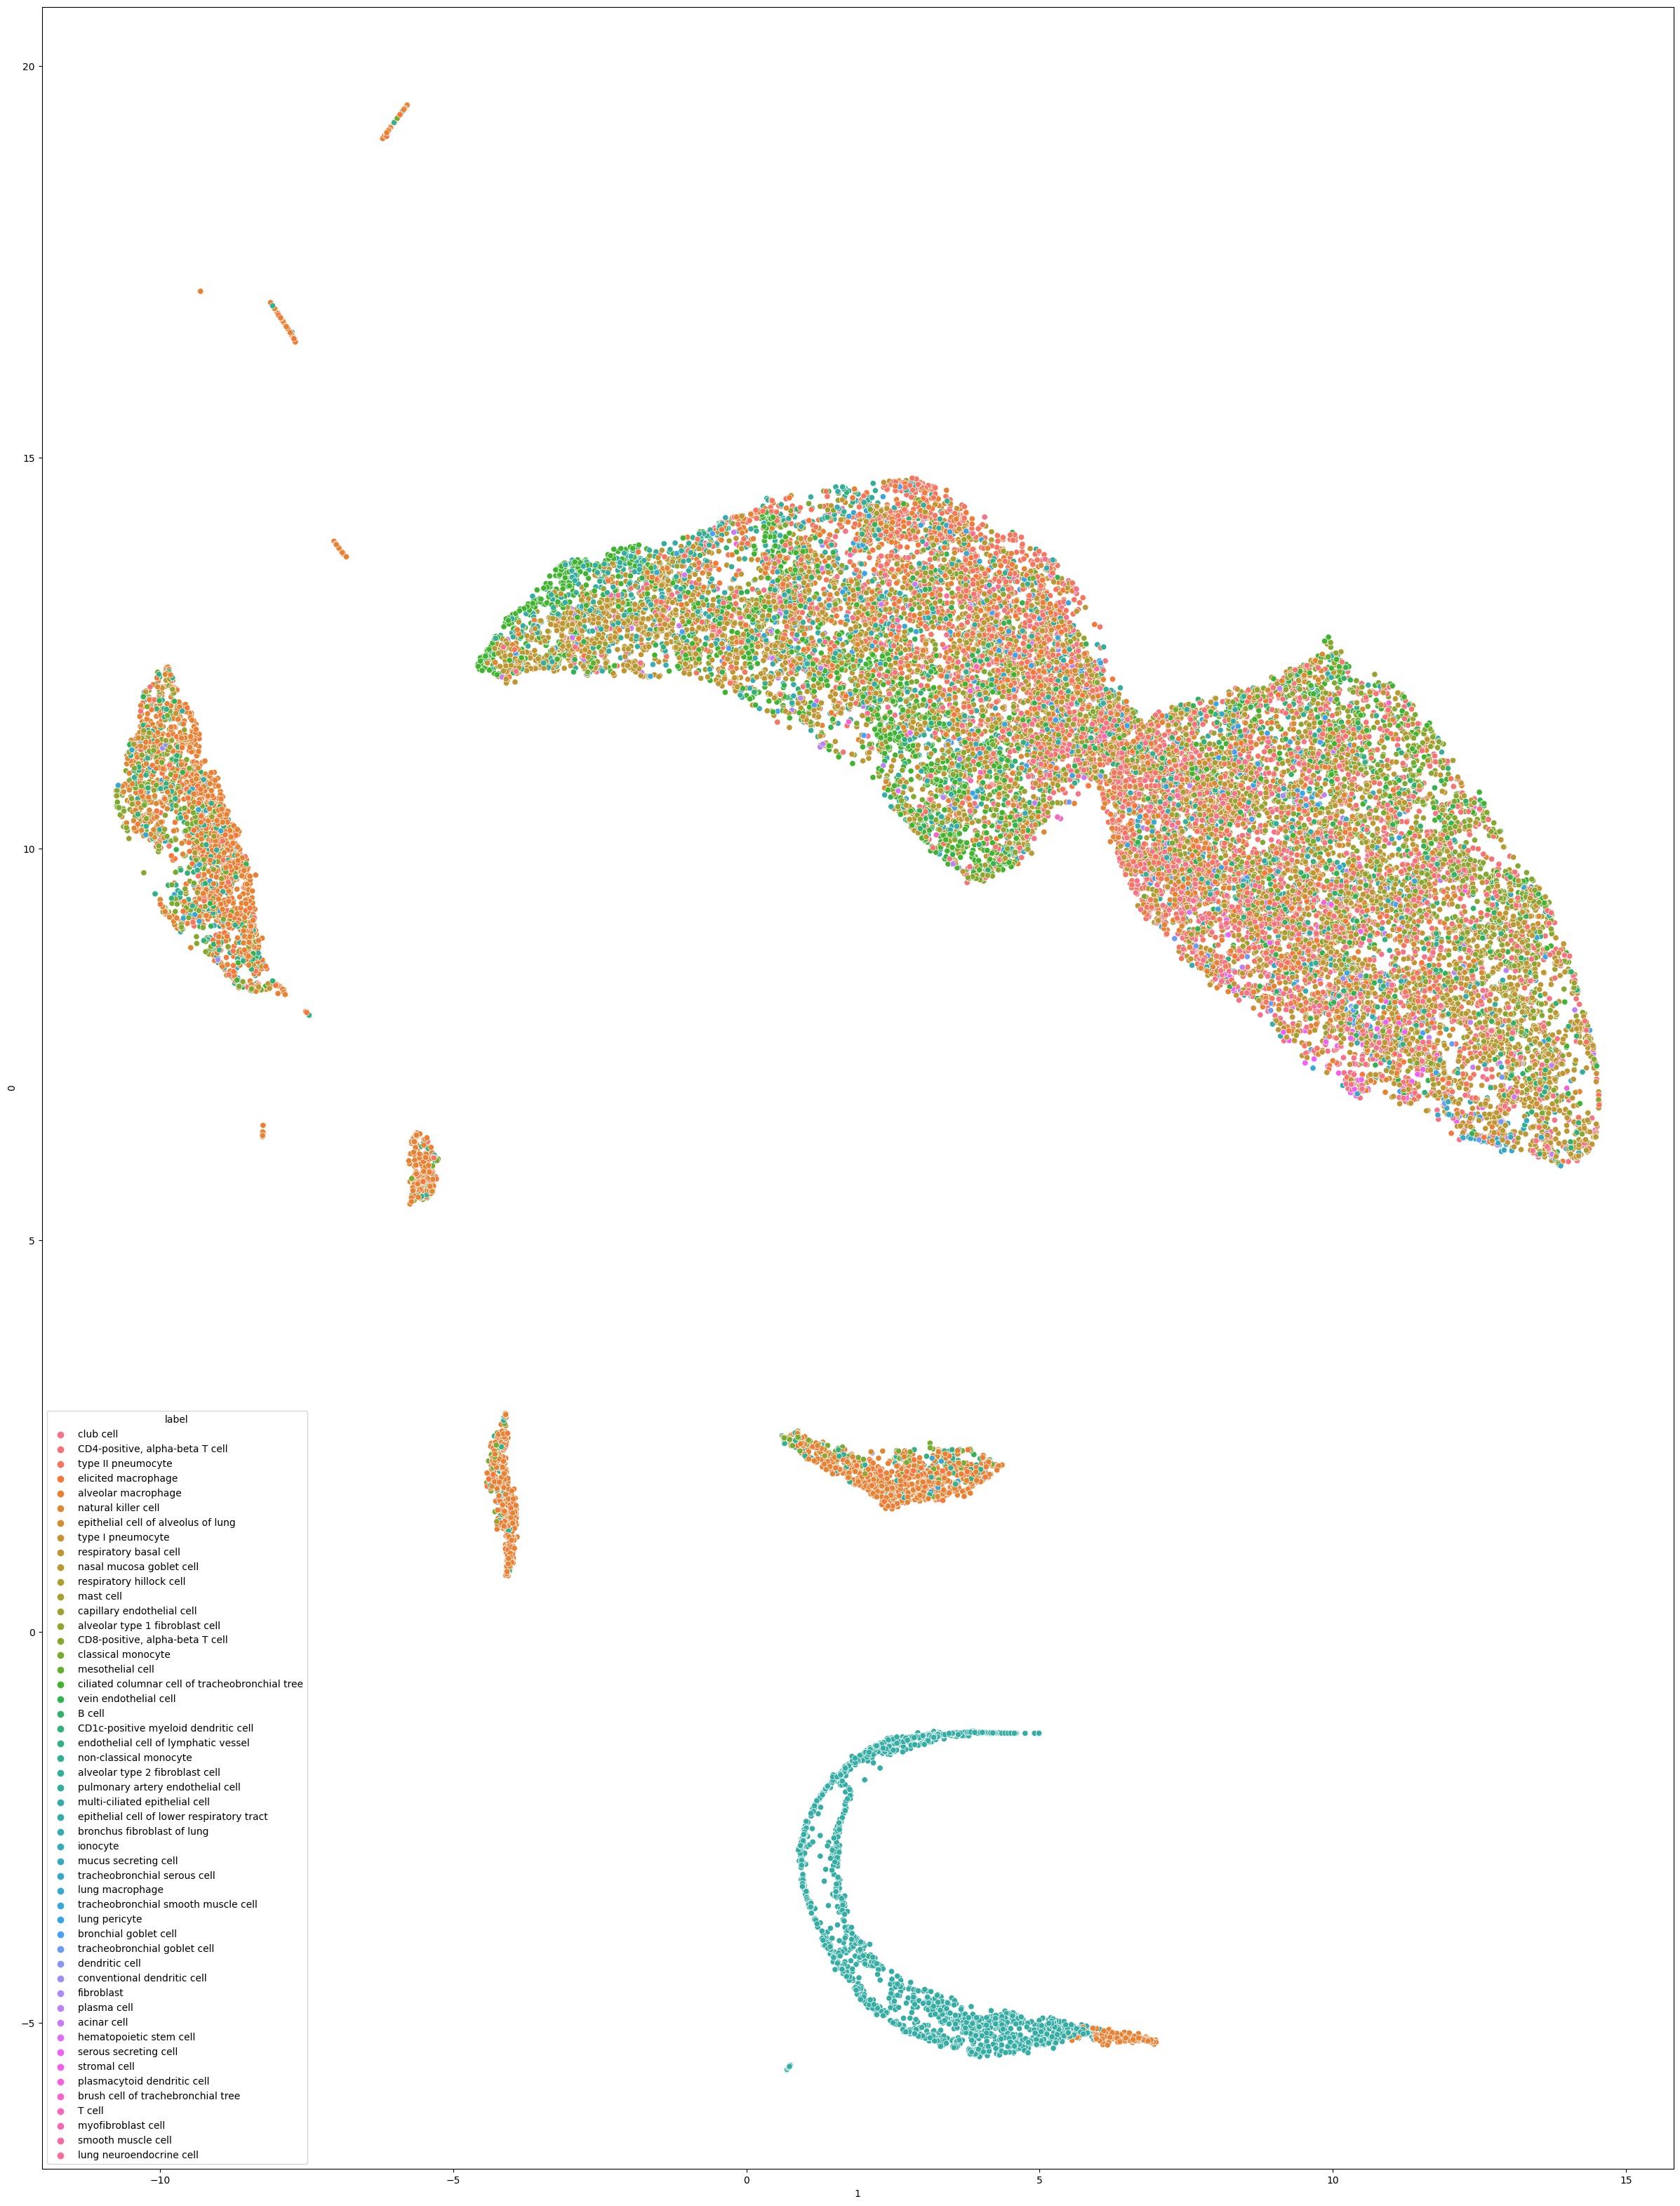

In [71]:
plt.figure(figsize=(30,40))
sns.scatterplot(
    umap_embedding,
    x=1, y=0,
    hue="label",
    legend=True,
)

As we can see, the cell types are not creating clusters and they are mixed. 

<Axes: xlabel='1', ylabel='0'>

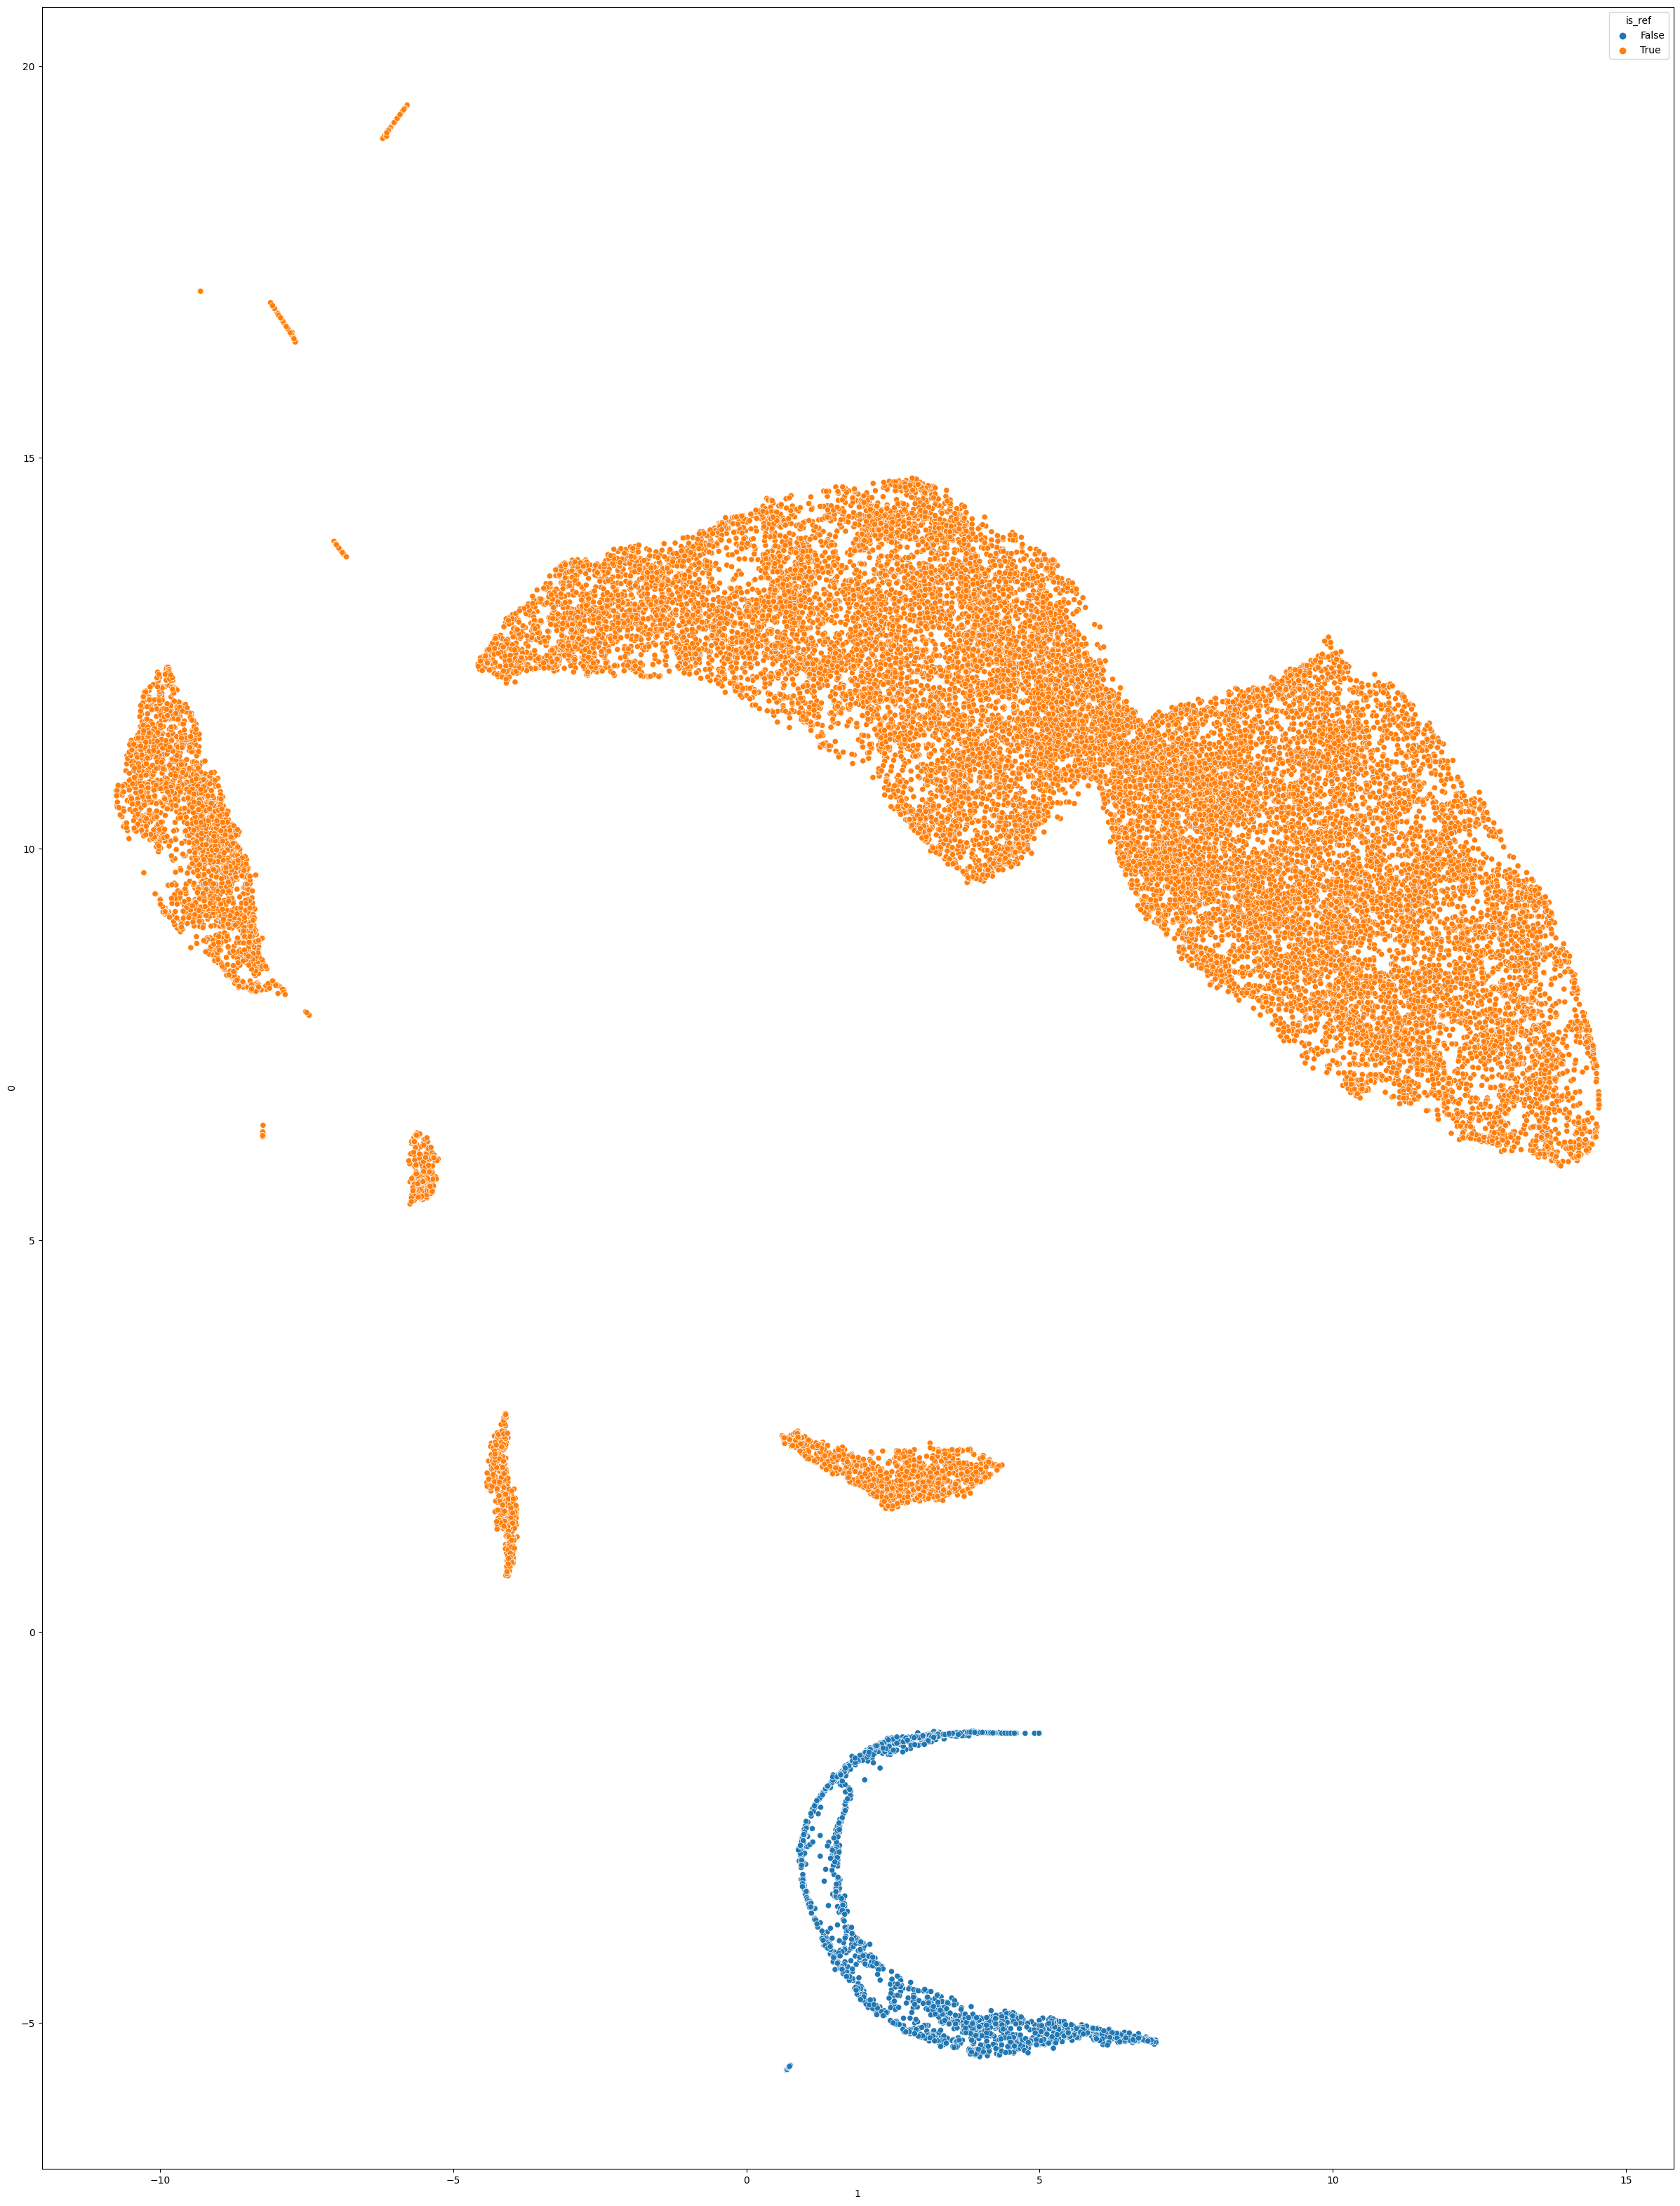

In [72]:
plt.figure(figsize=(30,40))
sns.scatterplot(
    umap_embedding,
    x=1, y=0,
    hue="is_ref",
    legend=True,
)


As we can see, the cells from query data create a seperate cluster and are far from the reference data. This makes it very hard for any classifier to predict the cell types of the cells in query. So we have to fine-tune the model we have.